In [2]:
from master import *

In [3]:
fq = prefix+'H2qq-CF3.0CA3.0-sqg0100-esq0011/total.root'
X,Y = tools.pre_process(fq,f_gluon,nev_max=50000)
z = np.array([[p[0] for p in jet] for jet in X])
mults = [np.sum([1 if zi > 0 else 0 for zi in jet]) for jet in z]
optimal = an.nk(z,1) + an.nk(z,2)

Finished preprocessing at 50.956791162490845


In [4]:
pfn, pfn_roc, pfn_auc = tools.train_qg_pfn(X,Y,n_epoch=3,summary=False)
pfn_z, pfn_z_roc, pfn_z_auc = tools.train_qg_pfn_no_angular(X,Y,n_epoch=3,summary=False)
pfn_noz, pfn_noz_roc, pfn_noz_auc = tools.train_qg_pfn_only_angular(X,Y,n_epoch=3,summary=False)
efn, efn_roc, efn_auc = tools.train_qg_efn(X,Y,n_epoch=3,summary=False)

Model summary:
Train on 70000 samples, validate on 15000 samples
Epoch 1/3
70000/70000 [==============================] - 5s 65us/step - loss: 0.7077 - acc: 0.5608 - val_loss: 0.6726 - val_acc: 0.5851
Epoch 2/3
70000/70000 [==============================] - 2s 24us/step - loss: 0.6760 - acc: 0.5842 - val_loss: 0.6682 - val_acc: 0.5962
Epoch 3/3
70000/70000 [==============================] - 2s 22us/step - loss: 0.6731 - acc: 0.5867 - val_loss: 0.6671 - val_acc: 0.5981
Finished training at 9.24639344215393

PFN AUC: 0.6332016268292365

Model summary:
Train on 70000 samples, validate on 15000 samples
Epoch 1/3
70000/70000 [==============================] - 3s 39us/step - loss: 0.7974 - acc: 0.5091 - val_loss: 0.6890 - val_acc: 0.5464
Epoch 2/3
70000/70000 [==============================] - 2s 23us/step - loss: 0.6895 - acc: 0.5383 - val_loss: 0.6873 - val_acc: 0.5417
Epoch 3/3
70000/70000 [==============================] - 2s 22us/step - loss: 0.6886 - acc: 0.5422 - val_loss: 0.6862 - va

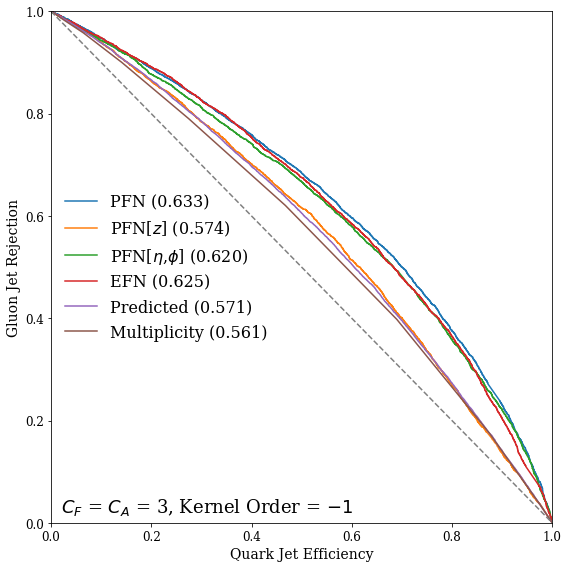

In [5]:
optimal_roc = roc_curve(Y[:,1],-optimal)
optimal_auc = roc_auc_score(Y[:,1],-optimal)
mult_roc = roc_curve(Y[:,1],mults)
mult_auc = roc_auc_score(Y[:,1],mults)
rocs = [pfn_roc,pfn_z_roc,pfn_noz_roc,efn_roc,optimal_roc,mult_roc]
aucs = [pfn_auc,pfn_z_auc,pfn_noz_auc,efn_auc,optimal_auc,mult_auc]
labels = ["PFN",r"PFN[$z$]",r"PFN[$\eta$,$\phi$]","EFN","Predicted","Multiplicity"]
plotting.plot_many(rocs,aucs,labels)